In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import  PartialDependenceDisplay,permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn import tree
import seaborn as sns
import numpy as np
from sklearn.inspection import partial_dependence
%matplotlib inline

# Load the dataset
data = pd.read_csv('day.csv')

# Select relevant features and target
features = ['hum','temp', 'windspeed','season','weekday']
target = 'cnt'
X = data.loc[:,'season':'windspeed']
y = data['cnt']  # Target is count of bike rentals

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled= pd.DataFrame(scaler.transform(X_test), columns=X.columns)

rf_clf = RandomForestClassifier(max_depth=4)
rf_clf.fit(X_train_scaled[features], y_train>=y_train.median())

rf_reg = RandomForestRegressor(max_depth=4)
rf_reg.fit(X_train_scaled[features], y_train)

RandomForestRegressor(max_depth=4)

Text(0.5, 0.98, 'Partial Dependence Plot for Season')

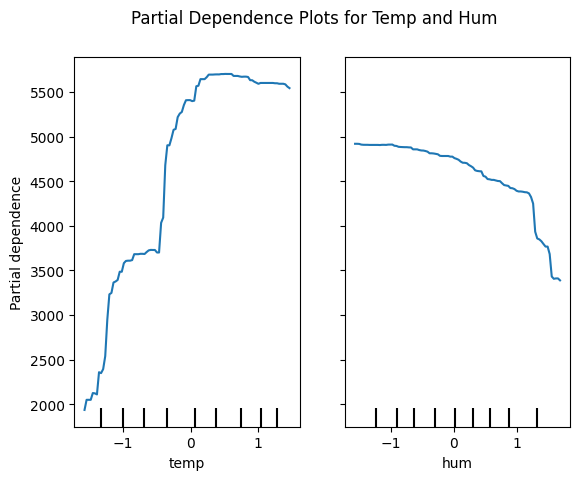

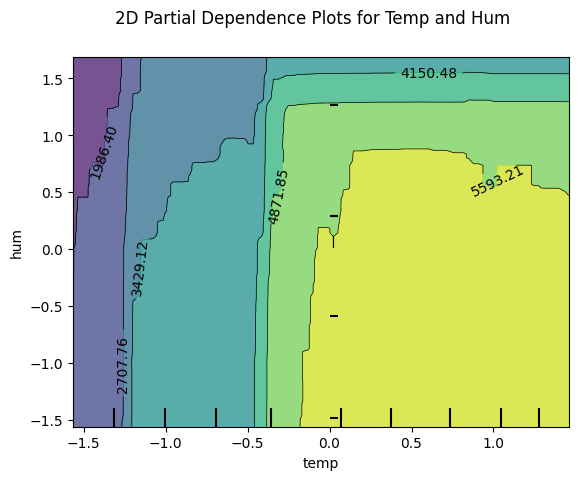

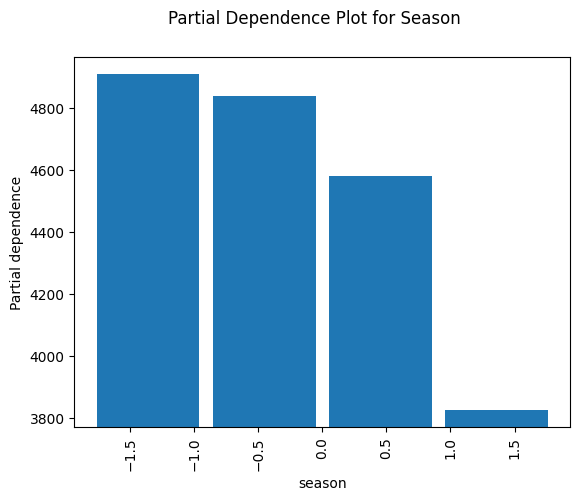

In [2]:
features_to_plot = ["temp", "hum"]
PartialDependenceDisplay.from_estimator(rf_reg, X_train_scaled[features], features_to_plot)
plt.suptitle("Partial Dependence Plots for Temp and Hum")

# 2D Partial Dependence Plot (temp vs hum)
PartialDependenceDisplay.from_estimator(rf_reg, X_train_scaled[features], [("temp", "hum")], kind="average")  # "both" for contours and scatter
plt.suptitle("2D Partial Dependence Plots for Temp and Hum")

# PDP for a categorical variable (season)
PartialDependenceDisplay.from_estimator(rf_reg, X_train_scaled, ['season'], categorical_features=['season'])
plt.suptitle("Partial Dependence Plot for Season")

Text(0.5, 0.98, 'Partial Dependence Plots for Windspeed and Hum')

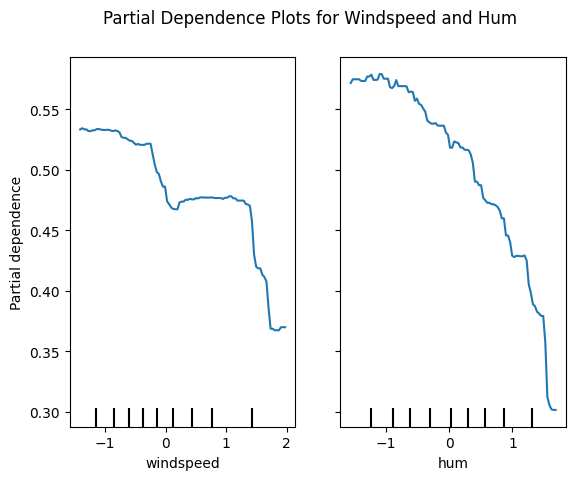

In [3]:
features_to_plot = ["windspeed", "hum"]
PartialDependenceDisplay.from_estimator(rf_clf, X_train_scaled[features], features_to_plot)
plt.suptitle("Partial Dependence Plots for Windspeed and Hum")

Text(0.5, 0.98, '2D Partial Dependence Plots for Windspeed and Hum')

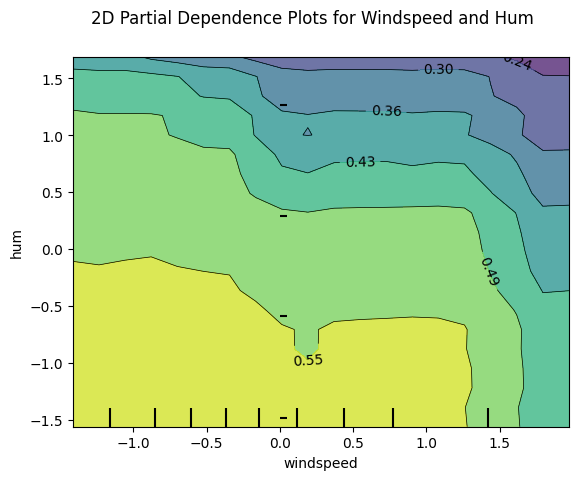

In [6]:
PartialDependenceDisplay.from_estimator(rf_clf, X_train_scaled[features], [("windspeed", "hum")], kind="average", grid_resolution=20)  # "both" for contours and scatter
plt.suptitle("2D Partial Dependence Plots for Windspeed and Hum")

Text(0.5, 0.98, 'Partial Dependence Plot for weekday')

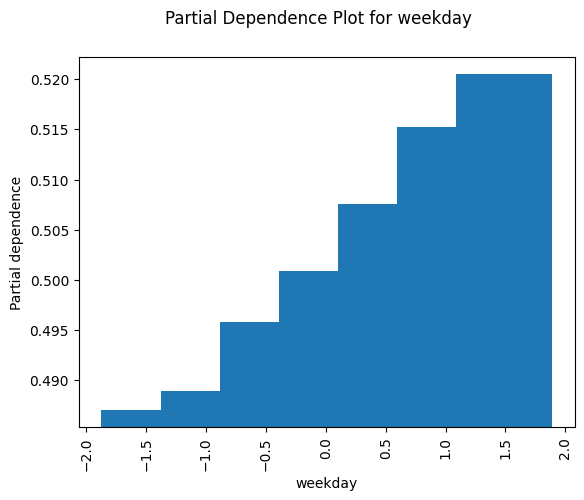

In [7]:
PartialDependenceDisplay.from_estimator(rf_clf, X_train_scaled[features], ['weekday'], categorical_features=['weekday'])
plt.suptitle("Partial Dependence Plot for weekday")